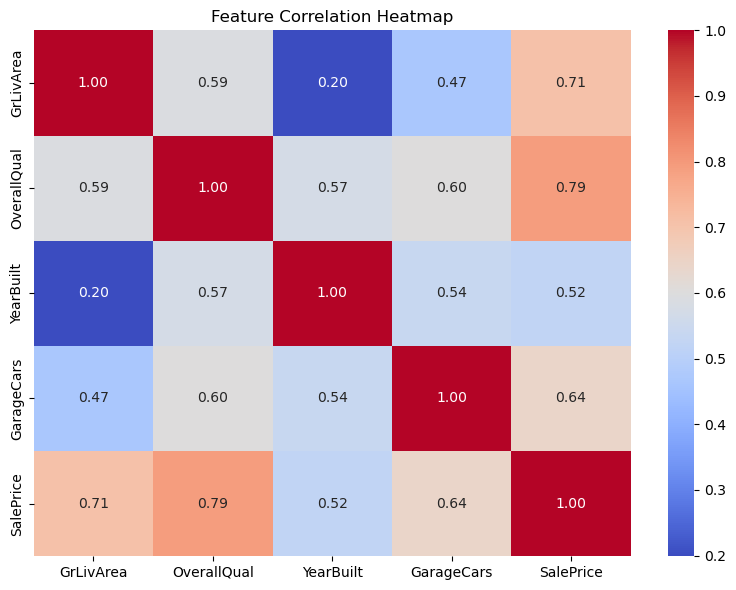

Cross-validated R² Score: 0.7459

Model Evaluation:
Mean Squared Error: 1807041969.63
R² Score: 0.7644

Model Coefficients:
       Feature   Coefficient
0    GrLivArea  28206.359968
1  OverallQual  30599.063102
2    YearBuilt  11505.089997
3   GarageCars  12321.086125


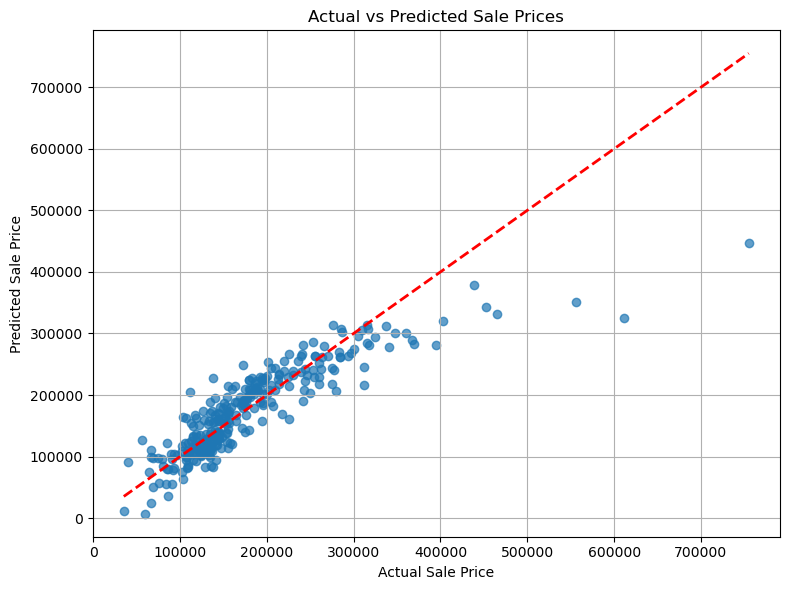

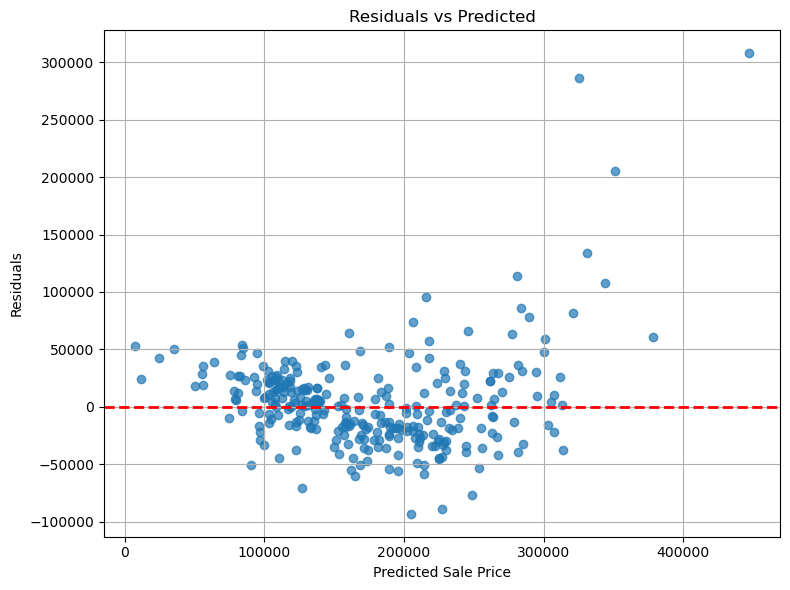

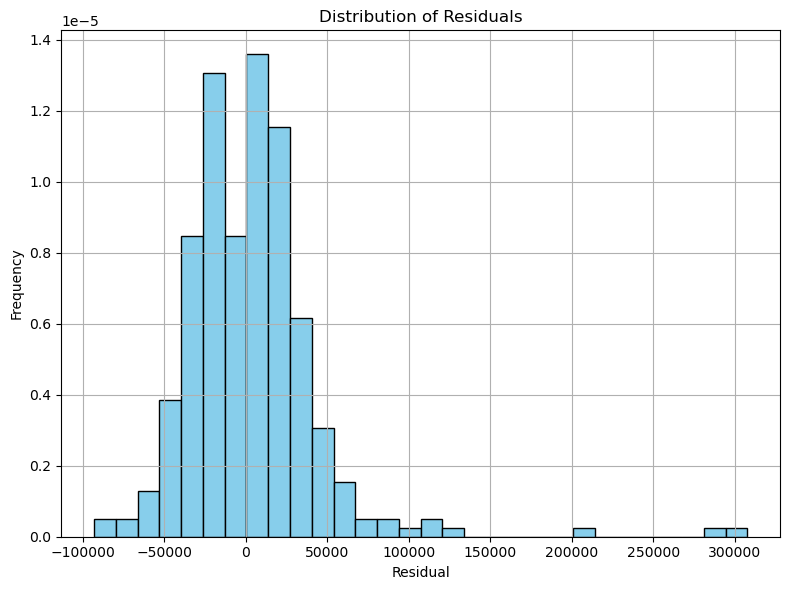

In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns  # Optional for better visualizations

# 2. Load the data
data = pd.read_csv('train.csv')

# 3. Select relevant features and target
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars']
target = 'SalePrice'

# Drop rows with missing values in selected columns
data = data[features + [target]].dropna()

# 4. Correlation heatmap using Seaborn (Optional for better visuals)
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Define features and target variable
X = data[features]
y = data[target]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 9. Cross-validation (on unscaled data with pipeline is better but this is fine for simple regression)
cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='r2')
print(f"Cross-validated R² Score: {cv_scores.mean():.4f}")

# 10. Make predictions
y_pred = model.predict(X_test_scaled)

# 11. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# 12. Coefficient interpretation
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coef_df)

# 13. Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# 14. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 15. Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
